<a href="https://colab.research.google.com/github/M123shashank/CP2-TED-Talk-Views-Prediction/blob/main/TED_Talk_Views_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> **Project: TED Talk Views Prediction** <b> <u>




##**Business Context**

### _TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages. Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experto from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TED chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates. The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website._

## **Problem Statement**

###**The objective of this project is to develop a predictive model that can accurately forecast the number of views for videos uploaded on the TEDx website. With over 4,000 TED talks available, encompassing a wide range of topics and languages, TED has become a global platform for spreading powerful ideas. By analyzing various factors such as talk content, speaker information, and other relevant attributes, the goal is to create a model that can provide insights into the popularity and viewership potential of TEDx videos. This predictive model will help TED and its contributors gain a better understanding of the factors influencing video views, allowing them to optimize content promotion, engage audiences, and enhance the overall impact of their talks.**

## <b> Data Description </b>

### <b>Attribute Information: </b>
Brief description of the data columns, you will find in the data file:

* talk_id : Unique Identifier for the TED talk
* title : Title of the TED talk
* speaker_1 : Main speaker of the talk
* all_speakers : List of all speakers in the talk
* occupations : Occupations or professions of the speakers
* about_speakers : Information or background about the speakers
* views : Number of views the talk has received
* recorded_date : Date when the talk was recorded
* published_date : Date when the talk was published
* event : Event or conference where the talk took place
* native_lang : Native language of the talk (abbreviated)
* available_lang : Available languages for the talk (abbreviated)
* comments : Number of comments on the talk
* duration : Duration of the talk in minutes
* topics : Topics covered in the talk
* related_talks : Related TED talks that are recommended
* url : URL or link to the talk
* description : Description or summary of the talk
* transcript : Full transcript of the talk


## **Importing**

In [140]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats


import warnings
warnings.filterwarnings('ignore')

In [141]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [142]:
# Importing Dataset
data_ted = pd.read_csv('/content/drive/MyDrive/AlmaBetter/ML Projects/1 Regression_Ted_Talk_Views_Prediction Project/data_ted_talks.csv')

## **Dataset Inspection**

In [143]:
#First Look at the dataset
data_ted.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [144]:
data_ted.tail()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
4000,62678,"Crisis support for the world, one text away",Nancy Lublin,{0: 'Nancy Lublin'},{0: ['health activist']},"{0: 'Nancy Lublin, cofounder and CEO of Crisis...",502934,2020-04-22,2020-04-27,TED2020: The Prequel,en,['en'],6.0,690,"['activism', 'data', 'technology', 'mental hea...",{2362: 'How data from a crisis text line is sa...,https://www.ted.com/talks/nancy_lublin_crisis_...,What if we could help people in crisis anytime...,"""I'm 14, and I want to go home."" ""My name is B..."
4001,62782,The dark history of IQ tests,Stefan C Dombrowski,{0: 'Stefan C Dombrowski'},NaN,NaN,307187,2020-04-27,2020-04-27,TED-Ed,en,"['en', 'es', 'my', 'pt-br']",NaN,346,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,https://www.ted.com/talks/stefan_c_dombrowski_...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo..."
4002,62263,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: 'Dick M. Carpenter II'},{0: ['law researcher']},{0: 'Dick M. Carpenter II studies cutting edge...,464414,2019-06-22,2020-04-28,TEDxMileHigh,en,['en'],9.0,774,"['society', 'law', 'policy', 'justice system',...","{2406: 'I love being a police officer, but we ...",https://www.ted.com/talks/dick_m_carpenter_ii_...,"Many countries have an active, centuries-old l...",Picture yourself driving down the road tomorro...
4003,62784,The electrifying speeches of Sojourner Truth,Daina Ramey Berry,{0: 'Daina Ramey Berry'},NaN,NaN,56582,2020-04-28,2020-04-30,TED-Ed,en,['en'],NaN,257,"['TED-Ed', 'education', 'animation', 'United S...",{20973: 'The breathtaking courage of Harriet T...,https://www.ted.com/talks/daina_ramey_berry_th...,Isabella Baumfree was born into slavery in lat...,"In early 1828, Sojourner Truth approached the ..."
4004,62794,The most important anus in the ocean,Cella Wright,{0: 'Cella Wright'},NaN,NaN,0,2020-04-30,2020-04-30,TED-Ed,en,['en'],NaN,281,"['animals', 'TED-Ed', 'animation', 'oceans', '...","{62347: 'The bug that poops candy', 29159: 'In...",https://www.ted.com/talks/cella_wright_the_mos...,Is it a fuzzy sock? An overripe banana? A mold...,Can you guess what you’re looking at? Is it a ...


* We can observe that there are some Null values present in the dataset.
* There are some rows showing views as 0, it looks like missing value as It's almost impossible to have zero views on TED talks channel.
* The Null values in comments section may be because of comments disabled on video or due to some inconsistency problem. We will deal with its values later on.

In [145]:
data_ted.shape

(4005, 19)

The above result shows that my data has 4005 rows/data records and 19 columns/features.

In [146]:
#Detailed information about the type of data and features with missing values
data_ted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

1. _We can see that most of the data is categorical or textual._

2. _We can also observe that there are only 4 features having some missing values._

3. _Incorrect data-type assigned to `recorded_date` , `published_date` , `comments`._

In [147]:
# check null values count
data_ted.isnull().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

- occupations, about_speakers, comments have a lot of null values.

In [148]:
# describing only the columns having numeric data
data_ted.describe().T

,count,mean,std,min,25%,50%,75%,max
talk_id,4005.0,1.243254e+04,1.744758e+04,1.0,1252.0,2333.0,23777.0,62794.0
views,4005.0,2.148006e+06,3.451226e+06,0.0,882069.0,1375508.0,2133110.0,65051954.0
comments,3350.0,1.619970e+02,2.688389e+02,0.0,38.0,89.0,188.0,6449.0
duration,4005.0,7.240112e+02,3.617755e+02,60.0,393.0,738.0,974.0,3922.0


In [149]:
data_ted.describe(percentiles=[.01,.25,.50,.75,.80,.99]).T

,count,mean,std,min,1%,25%,50%,75%,80%,99%,max
talk_id,4005.0,1.243254e+04,1.744758e+04,1.0,44.04,1252.0,2333.0,23777.0,24402.6,60751.60,62794.0
views,4005.0,2.148006e+06,3.451226e+06,0.0,39087.96,882069.0,1375508.0,2133110.0,2475286.0,16299833.68,65051954.0
comments,3350.0,1.619970e+02,2.688389e+02,0.0,5.00,38.0,89.0,188.0,227.0,1038.73,6449.0
duration,4005.0,7.240112e+02,3.617755e+02,60.0,185.00,393.0,738.0,974.0,1020.0,1601.12,3922.0


- It looks like 'views' have outliers at both the ends, 'comments' & 'duration' have outliers at the upper end.
- there are some rows where comments value is 0, and some rows where views value is 0 (strange).

In [150]:
data_ted[data_ted['comments']== 0]

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
3893,57920,The power of the Afro pick,Jon Gray,{0: 'Jon Gray'},"{0: ['food enthusiast', 'dishwasher']}",{0: 'Culinary evangelist Jon Gray is the voice...,208222,2020-02-04,2020-02-17,Small Thing Big Idea,en,"['ar', 'en', 'es', 'fr', 'tr']",0.0,213,"['design', 'history', 'culture', 'creativity',...",{44259: 'The next big thing is coming from the...,https://www.ted.com/talks/jon_gray_the_power_o...,The Afro pick is much more than a styling tool...,"You don't really look at a toothbrush and say,..."
3898,58706,How surfboards connect us to nature,Yves Béhar,{0: 'Yves Béhar'},{0: ['designer']},"{0: 'Yves Béhar is a designer, entrepreneur an...",181783,2020-02-11,2020-02-18,Small Thing Big Idea,en,"['ar', 'en', 'es', 'fr', 'pt-br', 'tr']",0.0,203,"['oceans', 'design', 'creativity', 'water', 's...","{57920: 'The power of the Afro pick', 57917: '...",https://www.ted.com/talks/yves_behar_how_surfb...,Here's how the surfboard changed our relations...,Riding a wave is like suddenly gaining speed a...


In [151]:
data_ted[data_ted['views']== 0]

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
2813,17850,Por qué necesitamos proteger el alta mar,Enric Sala,{0: 'Enric Sala'},{0: ['marine ecologist']},{0: 'Dr. Enric Sala is a former university pro...,0,2018-04-26,2018-06-06,TED en Español en NYC,es,"['en', 'es']",NaN,772,"['environment', 'economics', 'biosphere', 'nat...","{17733: ""Let's turn the high seas into the wor...",https://www.ted.com/talks/enric_sala_por_que_n...,Estamos pescando más rápido que la capacidad d...,If you randomly jumped in any point of the sea...
3056,29009,Cómo usar el arte de la fotografía para restau...,Alejandro Chaskielberg,{0: 'Alejandro Chaskielberg'},{0: ['photographer']},"{0: 'Alejandro Chaskielberg is a photographer,...",0,2018-11-05,2018-11-29,TEDxRiodelaPlata,es,"['en', 'es', 'pt']",NaN,862,"['art', 'photography', 'community', 'history',...",{2854: 'How your pictures can help reclaim los...,https://www.ted.com/talks/alejandro_chaskielbe...,¿Qué le puede suceder a la memoria cuando la e...,"Recently, my daughter and I decided to give aw..."
3068,29688,Por qué deberíamos comer más bichos,Renata di Tullio,{0: 'Renata di Tullio'},{0: ['técnica agropecuaria y agroalimentaria']},{0: 'Rena es Técnica Agropecuaria y Agroalimen...,0,2018-11-05,2018-12-07,TEDxRiodelaPlata,es,"['en', 'es', 'nl']",NaN,417,"['global issues', 'science', 'insects', 'food'...","{2427: 'The case for fish farming', 1018: 'Why...",https://www.ted.com/talks/renata_di_tullio_por...,"Have you ever considered crickets, houseflies ...",I'm passionate about insects for two reasons. ...
3520,43755,Can dogs sniff out malaria?,James Logan,{0: 'James Logan'},"{0: ['biologist', 'medical entomologist']}",{0: 'Professor James Logan leads an internatio...,0,2019-05-18,2019-06-11,TEDxLondon,en,"['en', 'pt-br', 'ru', 'zh-tw']",NaN,1099,"['health', 'public health', 'animals', 'smell'...",{1819: '3 reasons we still haven’t gotten rid ...,https://www.ted.com/talks/james_logan_can_dogs...,"Each year, hundreds of thousands of people aro...",Malaria is still one of the biggest killers on...
3790,55342,¿Como será el cine del futuro?,Diego Prilusky,{0: 'Diego Prilusky'},{0: ['productor audiovisual']},"{0: 'Diego viene del mundo de la producción, l...",0,2019-10-24,2019-12-19,TEDxRiodelaPlata,es,"['en', 'es', 'it']",NaN,743,"['technology', 'film', 'movies', 'entertainmen...","{1476: 'The shared wonder of film', 403: ""A to...",https://www.ted.com/talks/diego_prilusky_como_...,"Desde las películas western, hasta las cintas ...",The art of movies has existed for more than 10...
4004,62794,The most important anus in the ocean,Cella Wright,{0: 'Cella Wright'},NaN,NaN,0,2020-04-30,2020-04-30,TED-Ed,en,['en'],NaN,281,"['animals', 'TED-Ed', 'animation', 'oceans', '...","{62347: 'The bug that poops candy', 29159: 'In...",https://www.ted.com/talks/cella_wright_the_mos...,Is it a fuzzy sock? An overripe banana? A mold...,Can you guess what you’re looking at? Is it a ...


- 2 columns have value = 0 for comments.
- 6 rows have views = 0, this looks impossible & hence a missing value. Since, we have a very large dataset and views missing are very small, we can simply remove these records.

In [152]:
#let us describe all the features
data_ted.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
talk_id,4005.0,NaN,NaN,NaN,12432.538327,17447.576262,1.0,1252.0,2333.0,23777.0,62794.0
title,4005,4005,Averting the climate crisis,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
speaker_1,4005,3274,Alex Gendler,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
all_speakers,4001,3306,{0: 'Alex Gendler'},34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupations,3483,2049,{0: ['writer']},53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
about_speakers,3502,2977,{0: 'Alex Rosenthal takes everyday experiences...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
views,4005.0,NaN,NaN,NaN,2148005.573783,3451225.523659,0.0,882069.0,1375508.0,2133110.0,65051954.0
recorded_date,4004,1334,2017-04-24,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN
published_date,4005,2962,2017-09-07,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
event,4005,459,TED-Ed,556,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
# Check for duplicated data records
data_ted.duplicated().sum()

0

In [154]:
# Let us check for those features where dupliaction can cause problems
data_ted.duplicated(subset=['talk_id','title','speaker_1']).sum()

0

In [155]:
# checking unique native langauages
data_ted['native_lang'].unique()

array(['en', 'fr', 'de', 'pt', 'ko', 'zh-cn', 'ar', 'pt-br', 'es', 'ja',
       'it', 'hi'], dtype=object)

## **Observed issues in the records**

- Incorrect data-type assigned to recorded_date , published_date , comments : `Datatype issue`

- `Occupations` section has 522 missing values, `comments` section has 655 missing which need to be filled : `Missing data`

- We need to find solution for the outliers in features like views, comments and duration : Outlier detection & solution, we will deal with issue later.

- 6 rows having view == 0 needs to be removed : `Removing data`

- We will deal with untidy data like `topics` later.



## **Understanding the data & Preparing the plan**

**Process ->>** Removing data ->> Missing data ->> datatype issue

Important features which may affect the views maybe:
1. Title of the talk: More relevant or interesting the title is, more will be the audience.
2. Name of the speaker: In general, less people will watch unfamous speakers.
3. Occupation of speaker: The biggest portion of the audience that can connect to the occupation, more will be views.
4. available_lang: The more number of languages, more reach to audience.
5. comments: More number of comments, more attraction to audience.
6. Topics: General topics will attract the audience.

# **Data Preprocessing & Feature Engineering**

## **Data Cleaning**

In [156]:
# create a duplicate data frame from original
TEDtalks_df = data_ted.copy()

In [157]:
#Let us remove the data having views == 0
TEDtalks_df = TEDtalks_df[TEDtalks_df['views']!= 0]

In [158]:
# check if any data of views have value 0
print((TEDtalks_df['views'] == 0).sum())

0


In [159]:
# we will remove all the columns which are not useful for us
TEDtalks_df.drop(['talk_id','all_speakers','about_speakers','related_talks','url','description','transcript'], axis = 1, inplace = True)


In [160]:
# rename column speaker_1 to speaker
TEDtalks_df.rename(columns={'speaker_1': 'speaker'}, inplace=True)

In [161]:
TEDtalks_df.head()

,title,speaker,occupations,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics
0,Averting the climate crisis,Al Gore,{0: ['climate advocate']},3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change..."
1,The best stats you've ever seen,Hans Rosling,{0: ['global health expert; data visionary']},14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic..."
2,Simplicity sells,David Pogue,{0: ['technology columnist']},1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi..."
3,Greening the ghetto,Majora Carter,{0: ['activist for environmental justice']},2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c..."
4,Do schools kill creativity?,Sir Ken Robinson,"{0: ['author', 'educator']}",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',..."


In [162]:
TEDtalks_df.shape

(3999, 12)

In [163]:
TEDtalks_df.columns

Index(['title', 'speaker', 'occupations', 'views', 'recorded_date',
       'published_date', 'event', 'native_lang', 'available_lang', 'comments',
       'duration', 'topics'],
      dtype='object')

## **Handling Missing Data**

In [164]:
# missing data percentage
def missing_values():
  missing = TEDtalks_df.columns[TEDtalks_df.isnull().any()].tolist()
  return missing

print('Missing Data Percentage')
print('~'*50)
print(round(TEDtalks_df[missing_values()].isnull().sum().sort_values(ascending = False)/len(TEDtalks_df)*100,2))

Missing Data Percentage
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
comments         16.23
occupations      13.03
recorded_date     0.03
dtype: float64


### *Comments*

The missing data is less than 50% and the column is numerical. Comments is missing 655 observations. We will impute with the median/mean value.

<Axes: xlabel='comments', ylabel='Density'>

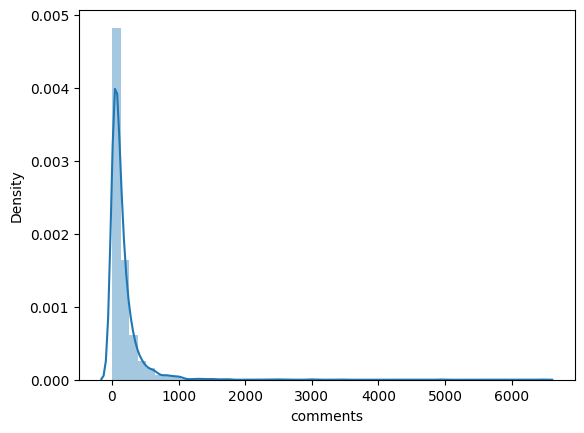

In [165]:
sns.distplot(TEDtalks_df.comments.dropna())

The data is positively skewed and hence we will impute it with median


In [166]:
TEDtalks_df['comments'] = TEDtalks_df['comments'].fillna(TEDtalks_df['comments'].median())
print('comments Missing After:', TEDtalks_df['comments'].isnull().sum())

comments Missing After: 0


### *Occupations*

The missing data is less than 50% and the column is textual, hence we will replace missing values with 'None'.

In [167]:
TEDtalks_df['occupations'] = TEDtalks_df['occupations'].fillna('None')
print('occupations Missing After:', TEDtalks_df['occupations'].isnull().sum())

occupations Missing After: 0


### *Recorded_date*

There is only one missing data here, hence, we will simply copy the  publishing_date to that empty recorded_date place.

In [168]:
TEDtalks_df[TEDtalks_df['recorded_date'].isnull()]

,title,speaker,occupations,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics
3831,The unpaid work that GDP ignores -- and why it...,Marilyn Waring,{0: ['economist']},1276272,NaN,2020-01-23,TEDxChristchurch,en,"['en', 'es', 'fr', 'it', 'ko', 'pt', 'tr', 'vi...",20.0,1039,"['global development', 'development', 'social ..."


In [169]:
TEDtalks_df['recorded_date'].fillna(TEDtalks_df['published_date'], inplace=True)

In [170]:
# Re-check null values count
TEDtalks_df.isnull().sum()

title             0
speaker           0
occupations       0
views             0
recorded_date     0
published_date    0
event             0
native_lang       0
available_lang    0
comments          0
duration          0
topics            0
dtype: int64

- We don't have any missing data now.

- Before proceeding to remove outliers, I want to move the target variable `view` at the end & feature `comments` at the second last place
- Also, we have to solve the datatype issue of some features 

In [171]:
# Get the column names except 'comments' column
column_names = [col for col in TEDtalks_df.columns if col != 'comments']

# Reorder the columns, placing 'comments' at the end
new_order = column_names + ['comments']
TEDtalks_df = TEDtalks_df[new_order]

In [172]:
# Get the column names except 'views' column
column_names = [col for col in TEDtalks_df.columns if col != 'views']

# Reorder the columns, placing 'views' at the end, it will automatically turn the 'comments' at second last place
new_order = column_names + ['views']
TEDtalks_df = TEDtalks_df[new_order]

In [173]:
TEDtalks_df.columns

Index(['title', 'speaker', 'occupations', 'recorded_date', 'published_date',
       'event', 'native_lang', 'available_lang', 'duration', 'topics',
       'comments', 'views'],
      dtype='object')

In [174]:
# change datatype of some columns
# also we will allocate a lesser memory to views and duration
TEDtalks_df = TEDtalks_df.astype({'comments':'int32', 'views':'int32', 'duration':'int32'})

TEDtalks_df['recorded_date'] = pd.to_datetime(TEDtalks_df['recorded_date'])
TEDtalks_df['published_date'] = pd.to_datetime(TEDtalks_df['published_date'])

In [175]:
# checking the datatype again
TEDtalks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 0 to 4003
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           3999 non-null   object        
 1   speaker         3999 non-null   object        
 2   occupations     3999 non-null   object        
 3   recorded_date   3999 non-null   datetime64[ns]
 4   published_date  3999 non-null   datetime64[ns]
 5   event           3999 non-null   object        
 6   native_lang     3999 non-null   object        
 7   available_lang  3999 non-null   object        
 8   duration        3999 non-null   int32         
 9   topics          3999 non-null   object        
 10  comments        3999 non-null   int32         
 11  views           3999 non-null   int32         
dtypes: datetime64[ns](2), int32(3), object(7)
memory usage: 359.3+ KB


## **Handling Outliers**

In [176]:
# find categorical variables
categorical = [var for var in TEDtalks_df.columns if TEDtalks_df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 7 categorical variables


In [177]:
# find Numerical variables
numerical = [var for var in TEDtalks_df.columns if TEDtalks_df[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 5 numerical variables


In [178]:
discrete = []
for var in numerical:
    if len(TEDtalks_df[var].unique())<20:
        print(var, ' values: ', TEDtalks_df[var].unique())
        discrete.append(var)
        
print('There are {} discrete variables'.format(len(discrete)))

There are 0 discrete variables


In [179]:
continuous = [var for var in numerical if var not in ['recorded_date', 'published_date']]
continuous

['duration', 'comments', 'views']

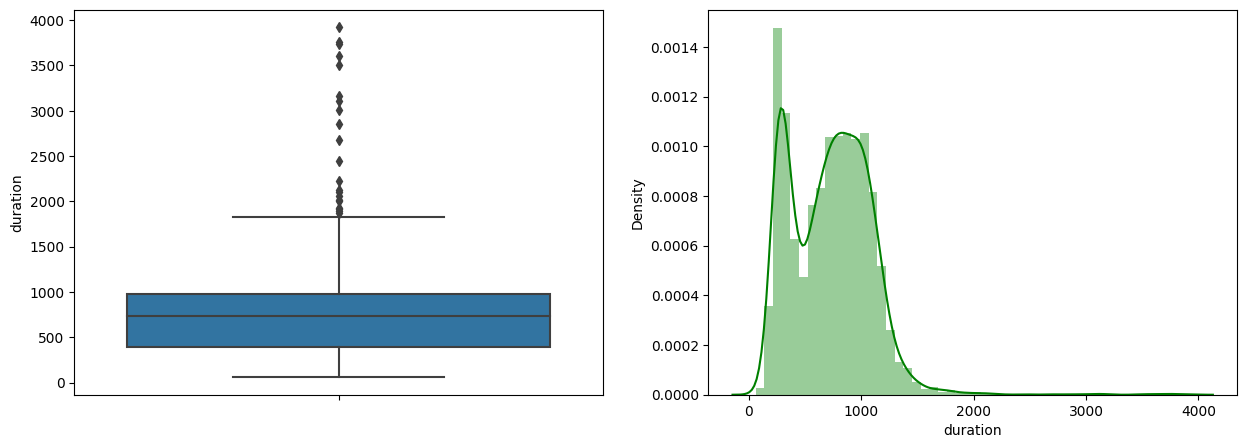

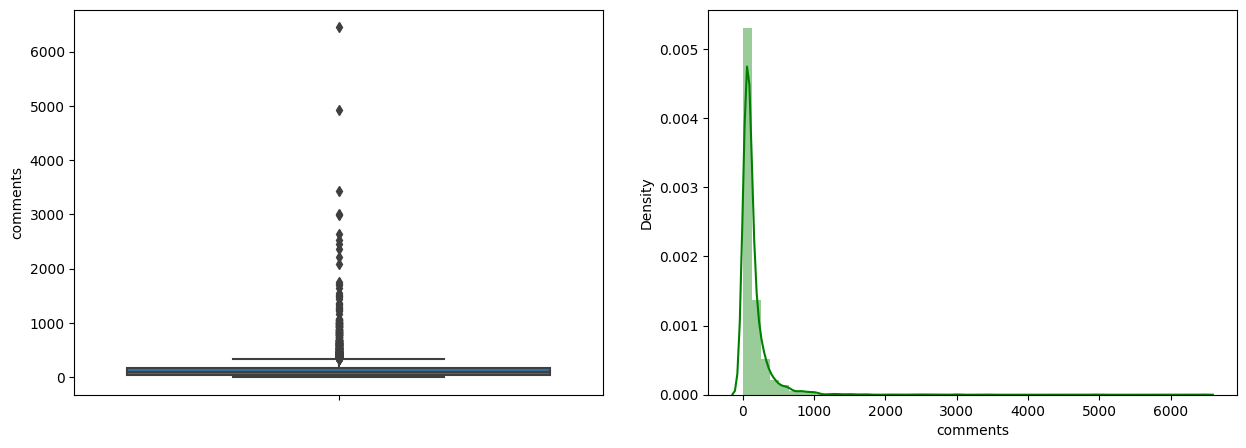

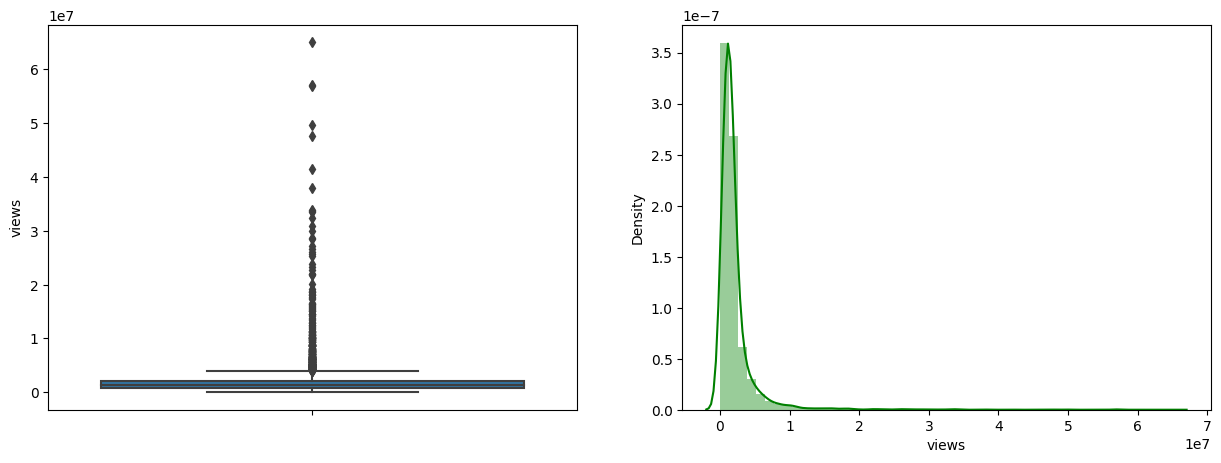

In [180]:
for var in continuous:
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=TEDtalks_df[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(TEDtalks_df[var].dropna(), color='green')
    fig.set_xlabel(var)

    plt.show()

Outliers can be visualised as the dots outside the whiskers in the boxplots. All three continuous variables seem to contain outliers. If we are planning to build linear regression, we should tackle these to improve the model performance.

- As we have less data to work upon, we will not drop the outliers, instead we will use log transformation for `views`, `comments` and capping for `duration`.

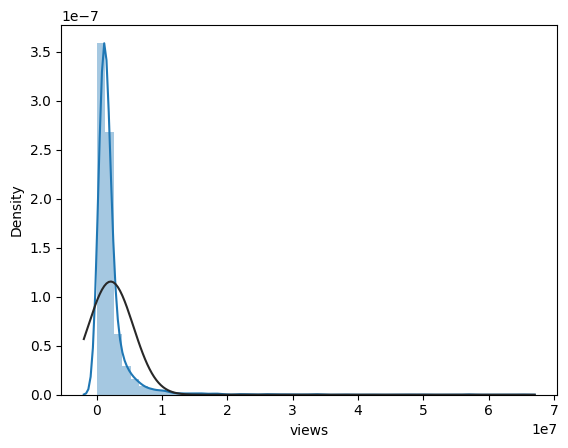

<Figure size 640x480 with 0 Axes>

In [181]:
# Target Variable Transformation
sns.distplot(TEDtalks_df['views'], fit=norm);
fig = plt.figure()

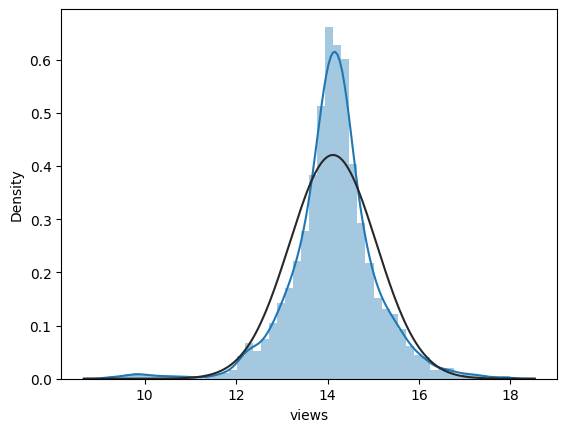

<Figure size 640x480 with 0 Axes>

In [182]:
# It looks more normal now.
sns.distplot((TEDtalks_df['views']).transform(np.log), fit=norm);
fig = plt.figure()

In [183]:
TEDtalks_df ['views_log'] = (TEDtalks_df['views']).transform(np.log)

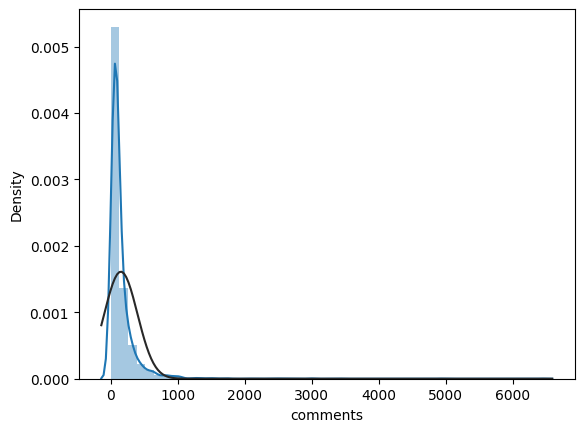

<Figure size 640x480 with 0 Axes>

In [184]:
#comments
sns.distplot(TEDtalks_df['comments'], fit=norm);
fig = plt.figure()

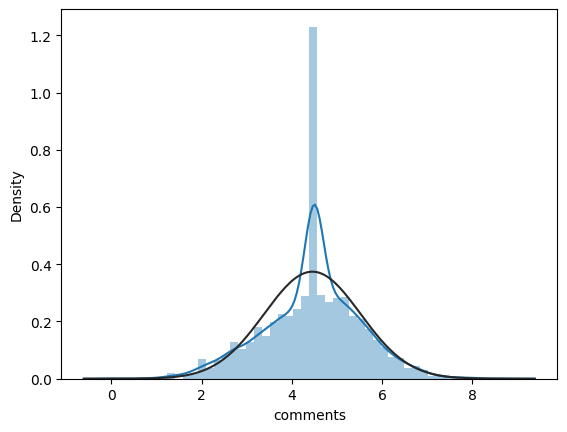

<Figure size 640x480 with 0 Axes>

In [185]:
# It looks more normal now.
sns.distplot((TEDtalks_df['comments']+1).transform(np.log), fit=norm);
fig = plt.figure()

In [186]:
TEDtalks_df ['comments_log'] = (TEDtalks_df['comments']+1).transform(np.log)

In [187]:
#Capping the `duration` with Percentiles
upper_lim = TEDtalks_df['duration'].quantile(.95)
lower_lim = TEDtalks_df['duration'].quantile(.05)
TEDtalks_df.loc[(TEDtalks_df["duration"] > upper_lim),"duration"] = upper_lim
TEDtalks_df.loc[(TEDtalks_df["duration"] < lower_lim),"duration"] = lower_lim

Text(0, 0.5, 'duration')

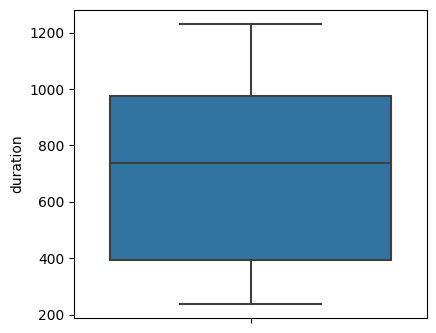

In [188]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
fig = sns.boxplot(y=TEDtalks_df["duration"])
fig.set_title('')
fig.set_ylabel("duration")

# **E D A and Feature Engineering**

In [189]:
numerical

['recorded_date', 'published_date', 'duration', 'comments', 'views']

In [190]:
# Let us check for correlation between variables using Pearson's method
selected_columns = ['duration', 'comments', 'views']

# Calculate the correlation matrix
correlation_matrix = TEDtalks_df[selected_columns].corr()

# Print the correlation matrix
print(correlation_matrix)

          duration  comments     views
duration  1.000000  0.206494  0.078365
comments  0.206494  1.000000  0.467657
views     0.078365  0.467657  1.000000


- There is a moderate correlation between views and comments.
- It is justified as more views means more reach and more chnaces of comments.
- Views and duration have very small correlation.
- In general, our data have no issue related to correlation.

### **`title`**

In [191]:
# find popular talk show titles and speakers based on views

fame_talk = TEDtalks_df[['title', 'speaker', 'views', 'occupations']].sort_values('views', ascending=False)[0:10]
fame_talk

,title,speaker,views,occupations
4,Do schools kill creativity?,Sir Ken Robinson,65051954,"{0: ['author', 'educator']}"
1296,Your body language may shape who you are,Amy Cuddy,57074270,{0: ['social psychologist']}
2062,This is what happens when you reply to spam email,James Veitch,56932551,{0: ['comedian and writer']}
646,How great leaders inspire action,Simon Sinek,49730580,{0: ['leadership expert']}
796,The power of vulnerability,Brené Brown,47544833,{0: ['vulnerability researcher']}
1724,How to speak so that people want to listen,Julian Treasure,41504331,{0: ['sound consultant']}
2108,Inside the mind of a master procrastinator,Tim Urban,37976820,{0: ['blogger']}
1366,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,33874546,{0: ['model']}
2724,My philosophy for a happy life,Sam Berns,33691484,{0: ['activist']}
1898,The next outbreak? We're not ready,Bill Gates,33521780,{0: ['philanthropist']}


**Observations:-**
- The top 3 talks have crossed the magical number of 50 Million views.
- Sir Ken Robinson's talk have topped the list with a very interesting title "Do schools kill creativity?"
- The list also gives and idea that it does not depends upon the occupation of the person. All top 10 people are from different fields.

### **`Speaker`**

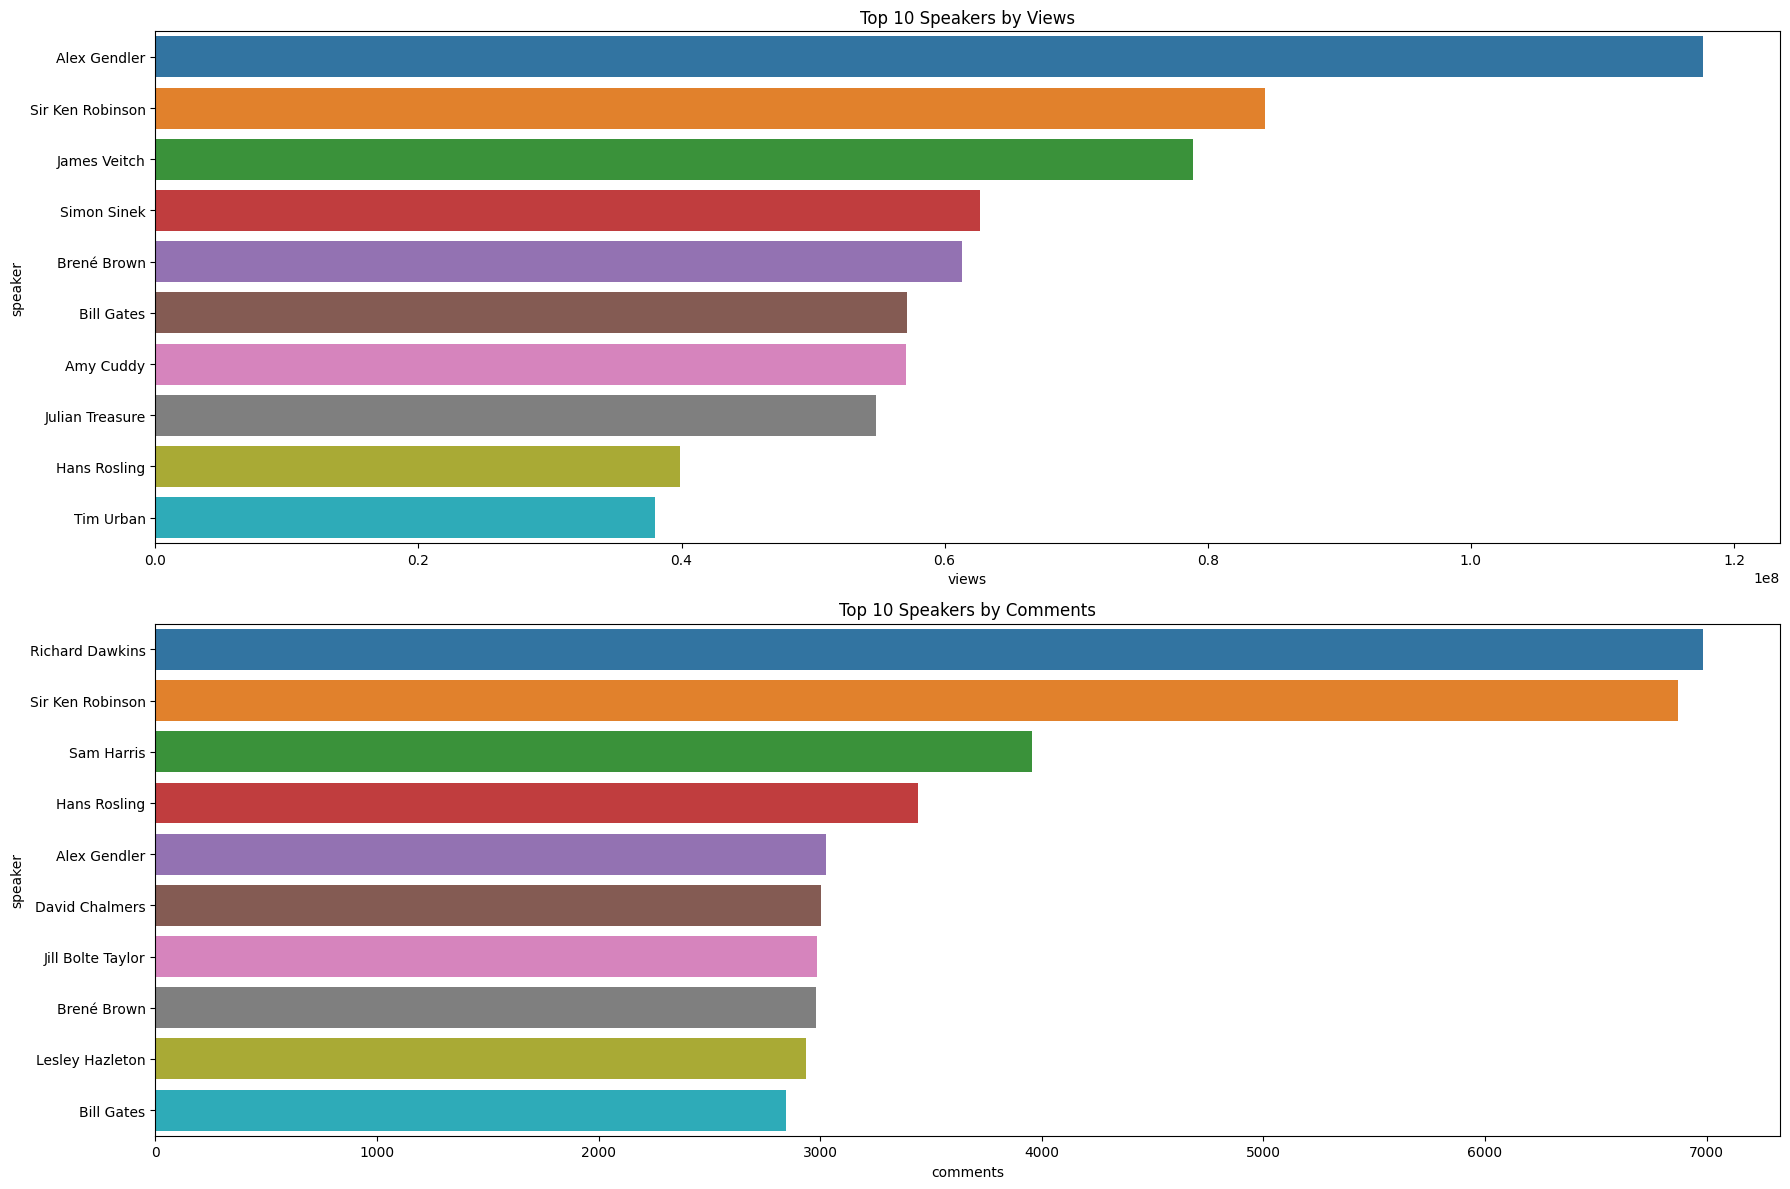

In [192]:
# creating a barplot with top 10 speakers by views & comments
top10_views = TEDtalks_df.groupby('speaker').views.sum().nlargest(10)
top10_views = top10_views.reset_index()

top10_comments = TEDtalks_df.groupby('speaker').comments.sum().nlargest(10)
top10_comments = top10_comments.reset_index()

fig, axs = plt.subplots(2,1, figsize=(18,12))
sns.barplot(x='views', y='speaker', data=top10_views, ax=axs[0])
axs[0].set_title('Top 10 Speakers by Views')

sns.barplot(x='comments', y='speaker', data=top10_comments, ax=axs[1])
axs[1].set_title('Top 10 Speakers by Comments')
plt.tight_layout()
plt.show()

In [193]:
# no. of unique speakers of TED talks
len(TEDtalks_df['speaker'].unique())

3271

### **Observations:-**

- We can observe that there are 5 speakers who are commmon in both the stats, it's means 5 people belong to both, the list of top views as well as comments.

- Also, we can see that toppers of both lists are far away than others in list. They can be also termed as the most viral talks.

In [194]:
# Let us take just an idea of skewness & kurtosis of the numerical columns 
TEDtalks_df.skew()

duration       -0.045270
comments        9.653691
views           8.184312
views_log      -0.536922
comments_log   -0.191344
dtype: float64

In [195]:
TEDtalks_df.kurt()

duration         -1.244252
comments        169.024904
views            98.673086
views_log         3.731612
comments_log      0.586418
dtype: float64

- It shows that skewness and kurtosis of `views` and `comments` became modified very well after log transformation.

- Let us have an interesting 3D visualization for three numerical features.

In [196]:
# plot 3D scatter plot of comments, duration and our target column views using plotly library.

fig = px.scatter_3d(TEDtalks_df, x=TEDtalks_df['duration'], y=TEDtalks_df['comments_log'], z=TEDtalks_df['views_log'], color= 'duration')

fig.show()

### **`speaker_popularity`**

In [197]:
# Create a new column 'speaker_popularity' in the main DataFrame and assign the categories

TEDtalks_df['speaker_popularity'] = ""
TEDtalks_df.loc[TEDtalks_df['views'] <= 500000, 'speaker_popularity'] = 'not_popular'
TEDtalks_df.loc[(TEDtalks_df['views'] > 500000) & (TEDtalks_df['views'] <= 1500000), 'speaker_popularity'] = 'avg_popular'
TEDtalks_df.loc[(TEDtalks_df['views'] > 1500000) & (TEDtalks_df['views'] <= 2500000), 'speaker_popularity'] = 'popular'
TEDtalks_df.loc[(TEDtalks_df['views'] > 2500000) & (TEDtalks_df['views'] <= 3500000), 'speaker_popularity'] = 'high_popular'
TEDtalks_df.loc[TEDtalks_df['views'] > 3500000, 'speaker_popularity'] = 'extreme_popular'

# check the dataset
TEDtalks_df.sample(2)

,title,speaker,occupations,recorded_date,published_date,event,native_lang,available_lang,duration,topics,comments,views,views_log,comments_log,speaker_popularity
1307,Let's pool our medical data,John Wilbanks,{0: ['data commons advocate']},2012-06-29,2012-10-16,TEDGlobal 2012,en,"['ar', 'bg', 'el', 'en', 'es', 'fr', 'he', 'hu...",985,"['health', 'health care', 'medical research', ...",94,583900,13.277485,4.553877,avg_popular
353,Play! Experiment! Discover!,Kary Mullis,{0: ['biochemist']},2002-02-02,2009-01-05,TED2002,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fr', 'he...",1231,"['DNA', 'biology', 'curiosity', 'history', 'mi...",119,598299,13.301846,4.787492,avg_popular


<Axes: xlabel='speaker_popularity', ylabel='comments'>

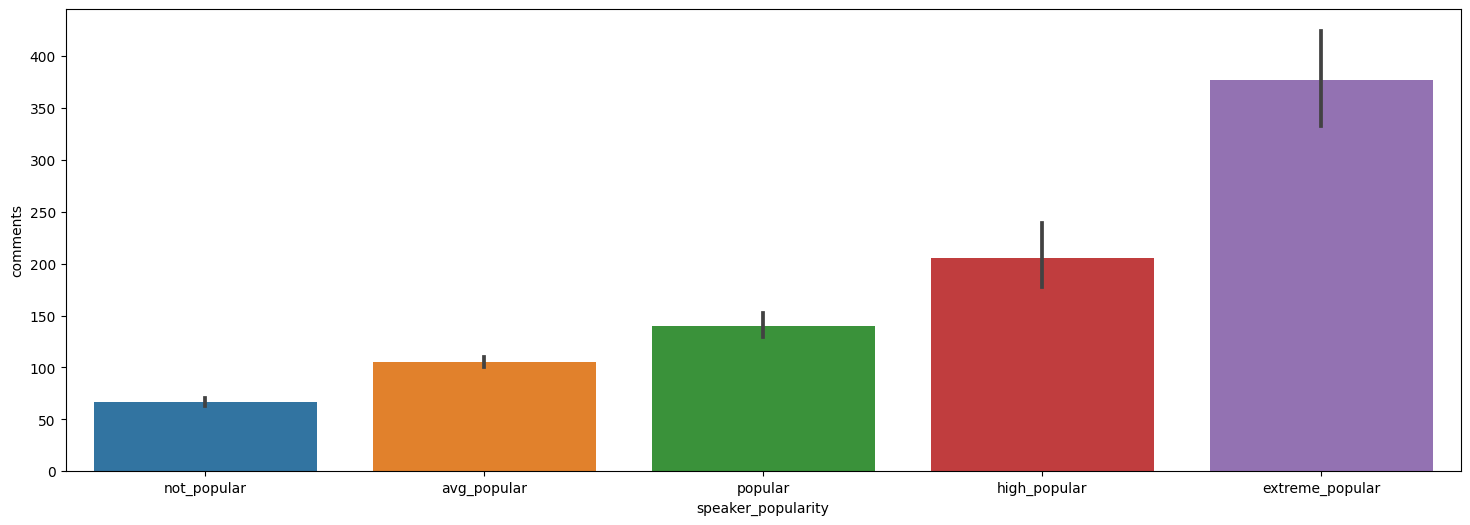

In [198]:
plt.figure(figsize=(18,6))
sns.barplot(data=TEDtalks_df, x='speaker_popularity', y='comments', 
            order=['not_popular', 'avg_popular', 'popular', 'high_popular', 'extreme_popular'])


- It's clearly visible that speaker_popularity has a correlation with comments.

- Based on this observation, we can say that the number of views for a TED Talk video is also predictable in certain scenarios.

- To improve the prediction model, we can consider including features such as speaker ratings on TED Talks, similar to how there are rating systems in feedback forms.

### **`video_rating`**

In [199]:
# Create a new column 'video_rating' in the main DataFrame and assign the categories

TEDtalks_df['video_rating'] = ""
TEDtalks_df.loc[TEDtalks_df['comments'] <= 50, 'video_rating'] = 1
TEDtalks_df.loc[(TEDtalks_df['comments'] > 50) & (TEDtalks_df['comments'] <= 120), 'video_rating'] = 2
TEDtalks_df.loc[(TEDtalks_df['comments'] > 120) & (TEDtalks_df['comments'] <= 200), 'video_rating'] = 3
TEDtalks_df.loc[(TEDtalks_df['comments'] > 200) & (TEDtalks_df['comments'] <= 300), 'video_rating'] = 4
TEDtalks_df.loc[TEDtalks_df['comments'] > 300, 'video_rating'] = 5

# check the dataset
TEDtalks_df.sample(2)


,title,speaker,occupations,recorded_date,published_date,event,native_lang,available_lang,duration,topics,comments,views,views_log,comments_log,speaker_popularity,video_rating
172,Underwater astonishments,David Gallo,{0: ['oceanographer']},2007-03-03,2008-01-11,TED2007,en,"['ar', 'az', 'bg', 'cs', 'da', 'de', 'el', 'en...",327,"['animals', 'evolution', 'exploration', 'fish'...",582,15890639,16.581241,6.368187,extreme_popular,5
2463,The era of blind faith in big data must end,Cathy O'Neil,"{0: ['mathematician', 'data scientist']}",2017-04-24,2017-08-22,TED2017,en,"['ar', 'bn', 'en', 'es', 'fa', 'fr', 'he', 'hu...",798,"['algorithm', 'data', 'inequality', 'marketing...",50,1404940,14.155505,3.931826,avg_popular,1


<Axes: xlabel='speaker_popularity', ylabel='video_rating'>

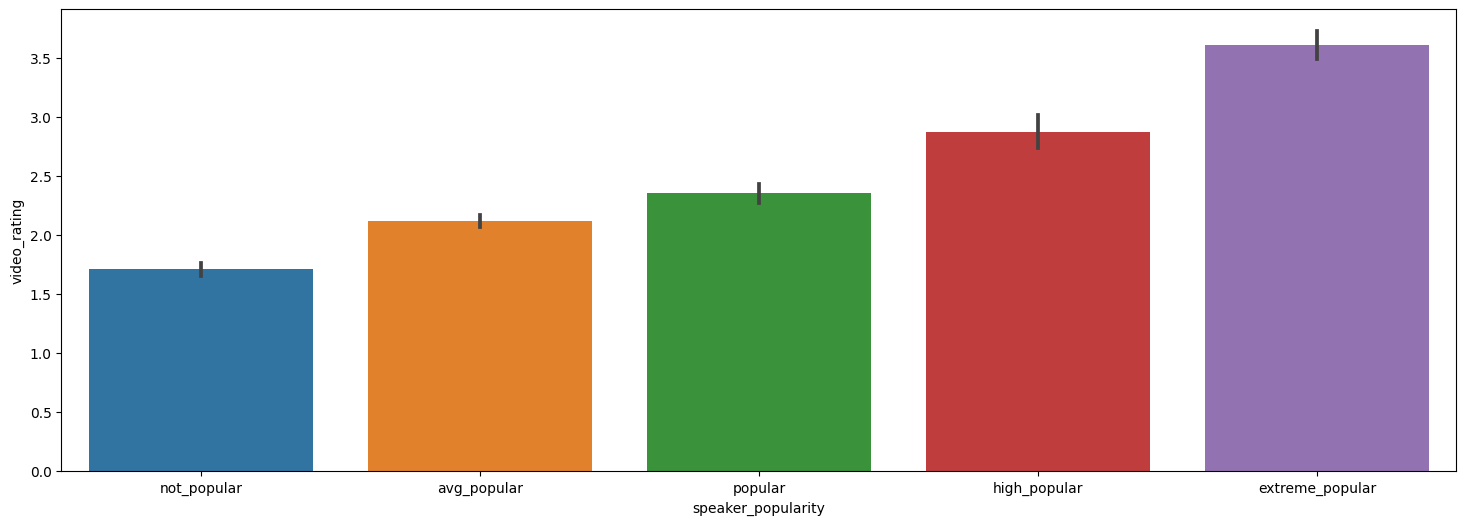

In [200]:
plt.figure(figsize=(18,6))
sns.barplot(data=TEDtalks_df, x='speaker_popularity', y='video_rating', 
            order=['not_popular', 'avg_popular', 'popular', 'high_popular', 'extreme_popular'])

- Comments are an indication of the relevance and engagement of audience in the topic of the TED talk.

- As we can observe, we created a new feature 'video_rating' based upon the comments.

- The video_rating is a good indicator of the speaker _popularity too as visible from the above graph, which is ultimately a indicator of views.

### **`native_lang`**

In [201]:
most_popular_lang = TEDtalks_df.groupby('native_lang')['views'].sum().nlargest(10)
print(most_popular_lang)

native_lang
en       8561354683
es         18624686
fr          8843261
it          3466037
ko          2057706
ja          2040853
ar          1452611
zh-cn       1368494
pt-br       1167889
hi          1153704
Name: views, dtype: int64


- It is astonishig to see that English is far beyond other langauges in terms of views, which can be termed as popularity too.

- Spanish is second most popular langauge but have much lower views than English.

- One of the reasons for English having so many views is because most of the speakers have used English for the communnication as English is a global language.

### **`published_date`**

In [202]:
# Making separate column for day, month and year of upload
TEDtalks_df['published_year'] = TEDtalks_df['published_date'].dt.year
TEDtalks_df['published_month'] = TEDtalks_df['published_date'].dt.month
TEDtalks_df['published_day'] = TEDtalks_df["published_date"].dt.day_name()

# storing weekdays in order of numbers from 0 to 6 value
daydict = {'Sunday' : 0, 'Monday' : 1, 'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6}

# making new column holding information of day number
TEDtalks_df['published_daynumber'] = TEDtalks_df['published_day'].map(daydict)

In [203]:
# add one more column published_months_ago
TEDtalks_df['published_months_ago'] = ((2023 - TEDtalks_df['published_year'])*12 + TEDtalks_df['published_month'])
TEDtalks_df.sample(1)

,title,speaker,occupations,recorded_date,published_date,event,native_lang,available_lang,duration,topics,...,views,views_log,comments_log,speaker_popularity,video_rating,published_year,published_month,published_day,published_daynumber,published_months_ago
1957,The math behind basketball's wildest moves,Rajiv Maheswaran,{0: ['researcher']},2015-03-17,2015-07-06,TED2015,en,"['ar', 'de', 'el', 'en', 'es', 'fa', 'fr', 'he...",728,"['math', 'sports', 'technology', 'visualizatio...",...,2701869,14.809454,3.89182,high_popular,1,2015,7,Monday,1,103


### **`event`**

In [204]:
# there are a lot of TED events
print(TEDtalks_df['event'].value_counts().head(10))

TED-Ed            555
TED2018            96
TED2017            96
TED2019            91
TED2014            84
TED2009            81
TED2016            75
TED2013            75
TED2015            75
TEDGlobal 2012     70
Name: event, dtype: int64


In [205]:
# add new column of each TED event type using existing column event
ted_categories = ['TED-Ed','TEDx', 'TED', 'TEDGlobal', 'TEDSummit', 'TEDWomen', 'TED Residency']

TEDtalks_df['TEDevent_type'] = TEDtalks_df['event'].map(lambda x: "TEDx" if x[0:4] == "TEDx" else x)
TEDtalks_df['TEDevent_type'] = TEDtalks_df['TEDevent_type'].map(lambda x: "TED-Ed" if x[0:4] == "TED_Ed" else x)
TEDtalks_df['TEDevent_type'] = TEDtalks_df['TEDevent_type'].map(lambda x: "TED" if x[0:4] == "TED2" else x)
TEDtalks_df['TEDevent_type'] = TEDtalks_df['TEDevent_type'].map(lambda x: "TEDGlobal" if x[0:4] == "TEDG" else x)
TEDtalks_df['TEDevent_type'] = TEDtalks_df['TEDevent_type'].map(lambda x: "TEDWomen" if x[0:4] == "TEDW" else x)
TEDtalks_df['TEDevent_type'] = TEDtalks_df['TEDevent_type'].map(lambda x: "TEDSummit" if x[0:4] == "TEDS" else x)
TEDtalks_df['TEDevent_type'] = TEDtalks_df['TEDevent_type'].map(lambda x: "TED Residency" if x[0:4] == "TEDR" else x)
TEDtalks_df['TEDevent_type'] = TEDtalks_df['TEDevent_type'].map(lambda x: "Other TED" if x not in ted_categories else x)


In [206]:
TEDtalks_df.sample(1)

,title,speaker,occupations,recorded_date,published_date,event,native_lang,available_lang,duration,topics,...,views_log,comments_log,speaker_popularity,video_rating,published_year,published_month,published_day,published_daynumber,published_months_ago,TEDevent_type
3446,How generational stereotypes hold us back at work,Leah Georges,{0: ['social psychologist']},2018-04-20,2019-04-24,TEDxCreightonU,en,"['ar', 'de', 'en', 'es', 'fr', 'hu', 'id', 'it...",695,"['TEDx', 'business', 'collaboration', 'leaders...",...,14.628419,3.555348,popular,1,2019,4,Wednesday,3,52,TEDx


In [207]:
# check the all events talkshows counts

pd.DataFrame(TEDtalks_df['TEDevent_type'].value_counts()).reset_index()

,index,TEDevent_type
0,TED,1178
1,TEDx,692
2,Other TED,678
3,TED-Ed,555
4,TEDGlobal,516
5,TEDWomen,194
6,TEDSummit,146
7,TED Residency,40


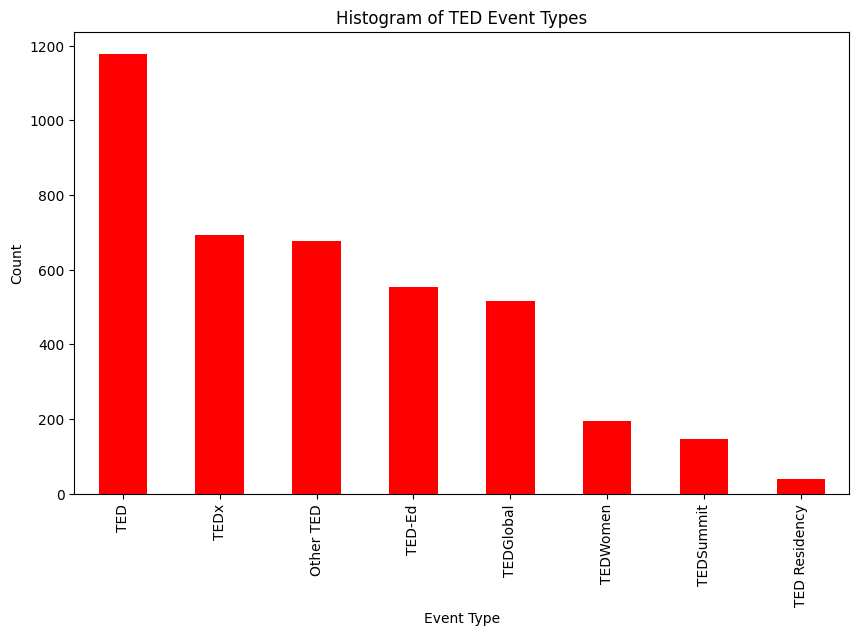

In [208]:
TEDtalks_df['TEDevent_type'].value_counts().plot.bar(figsize=(10, 6), color='red')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.title('Histogram of TED Event Types')
plt.show()


In [209]:
import ast
# use duplicate dataframe for topics analysis
df = TEDtalks_df.copy()

df['topics'] = df['topics'].apply(lambda x: ast.literal_eval(x))
s = df.apply(lambda x: pd.Series(x['topics']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'topic'

df = df.drop('topics', axis=1).join(s)

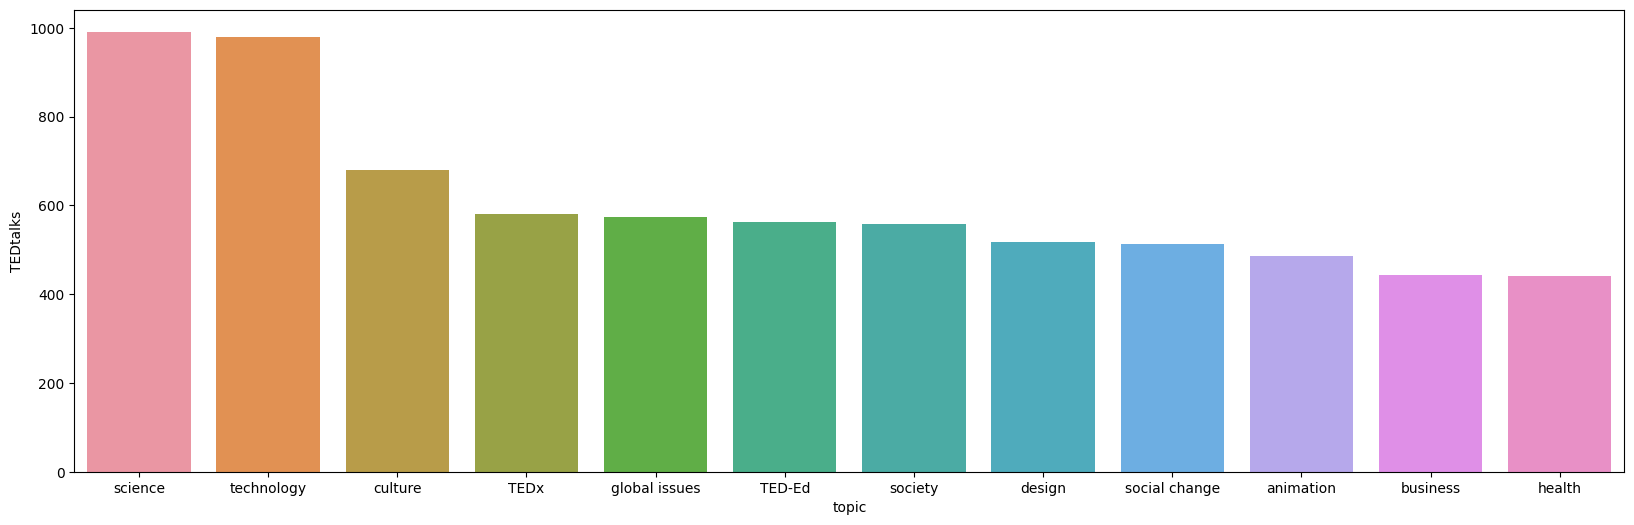

In [210]:
# plot a bar chart of popular topics of TEDx Website

pop_topic = pd.DataFrame(df['topic'].value_counts()).reset_index()
pop_topic.columns = ['topic', 'TEDtalks']

plt.figure(figsize=(20,6))
sns.barplot(x='topic', y='TEDtalks', data=pop_topic.head(12))
plt.show()

- As expected, science and Technology are the very popular topics for talks.

- The next question I want to answer is the trends in the share of topics of TED Talks across the world. Has the demand for Technology talks increased? Do certain years have a disproportionate share of talks related to global issues? Let's find out!

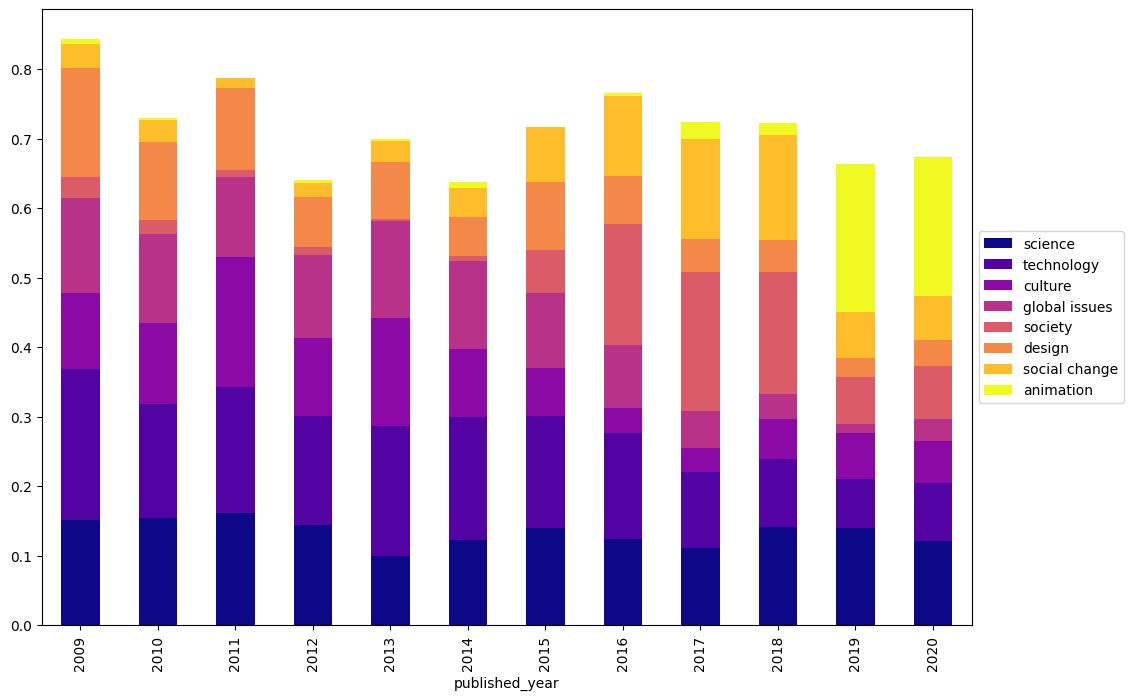

In [211]:
# plot the stacked bar charts of top 8 topics over the year and check trend
pop_theme_talks = df[(df['topic'].isin(pop_topic.head(12)['topic'])) & (df['topic'] != ('TEDx','TED-Ed'))]
pop_theme_talks['published_year'] = pop_theme_talks['published_year'].astype('int')
pop_theme_talks = pop_theme_talks[pop_theme_talks['published_year'] > 2008]

themes = list(pop_topic.head(10)['topic'])
themes.remove('TEDx')
themes.remove('TED-Ed')

ctab = pd.crosstab([pop_theme_talks['published_year']], pop_theme_talks['topic']).apply(lambda x: x/x.sum(), axis=1)
ctab[themes].plot(kind='bar', stacked=True, colormap='plasma', figsize=(12,8)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

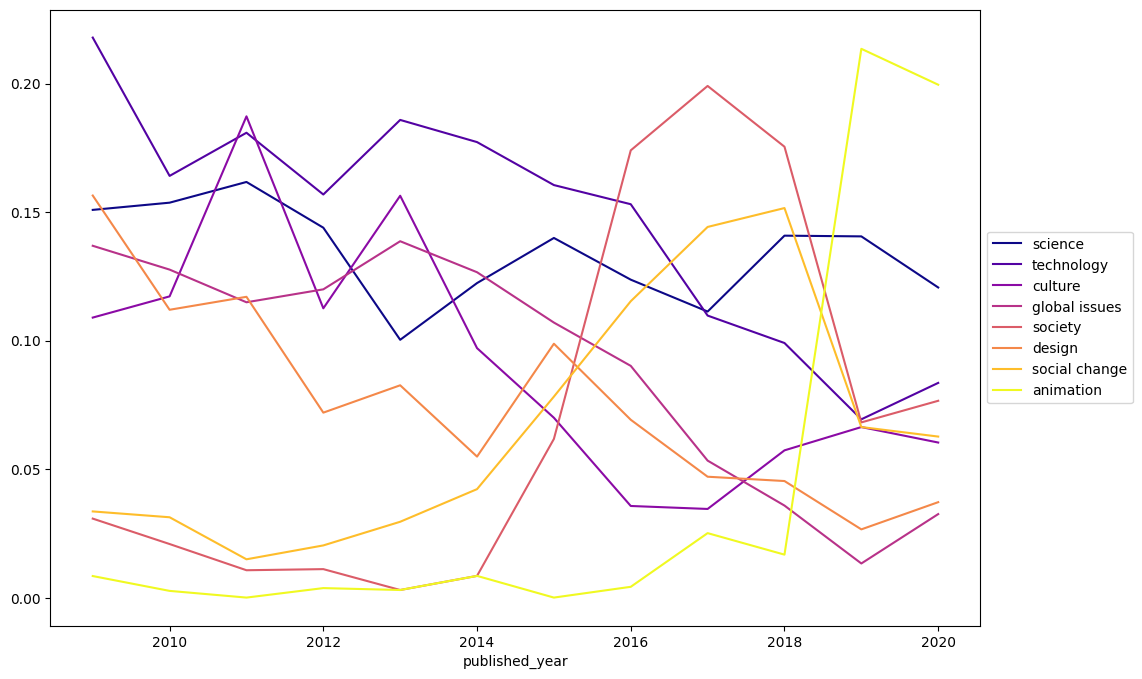

In [212]:
# plot line charts for top 8 topics perform over the year

ctab[themes].plot(kind='line', stacked=False, colormap='plasma', figsize=(12,8)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

- The technology talks has steadily decreased over the years but technology is #1 over the years and then after 2018 animation talks take place. This is understandable considering the boom of gaming industries and also boom of technology such as blockchain, deep learning and augmented with reality capturing people's imagination.

## **Feature selection**

In [213]:
TEDtalks_df.columns

Index(['title', 'speaker', 'occupations', 'recorded_date', 'published_date',
       'event', 'native_lang', 'available_lang', 'duration', 'topics',
       'comments', 'views', 'views_log', 'comments_log', 'speaker_popularity',
       'video_rating', 'published_year', 'published_month', 'published_day',
       'published_daynumber', 'published_months_ago', 'TEDevent_type'],
      dtype='object')

In [214]:
TEDtalks_df

,title,speaker,occupations,recorded_date,published_date,event,native_lang,available_lang,duration,topics,...,views_log,comments_log,speaker_popularity,video_rating,published_year,published_month,published_day,published_daynumber,published_months_ago,TEDevent_type
0,Averting the climate crisis,Al Gore,{0: ['climate advocate']},2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",977,"['alternative energy', 'cars', 'climate change...",...,15.074935,5.609472,extreme_popular,4,2006,6,Tuesday,2,210,TED
1,The best stats you've ever seen,Hans Rosling,{0: ['global health expert; data visionary']},2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...",...,16.489775,6.444131,extreme_popular,5,2006,6,Tuesday,2,210,TED
2,Simplicity sells,David Pogue,{0: ['technology columnist']},2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",1231,"['computers', 'entertainment', 'interface desi...",...,14.468269,4.828314,popular,3,2006,6,Tuesday,2,210,TED
3,Greening the ghetto,Majora Carter,{0: ['activist for environmental justice']},2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",1116,"['MacArthur grant', 'activism', 'business', 'c...",...,14.795365,5.393628,high_popular,4,2006,6,Tuesday,2,210,TED
4,Do schools kill creativity?,Sir Ken Robinson,"{0: ['author', 'educator']}",2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",1164,"['children', 'creativity', 'culture', 'dance',...",...,17.990697,8.503500,extreme_popular,5,2006,6,Tuesday,2,210,TED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999,A global pandemic calls for global solutions,Larry Brilliant,"{0: ['epidemiologist', 'philanthropist'], 1: [...",2020-04-22,2020-04-24,TED2020: The Prequel,en,"['en', 'es', 'it', 'pt-br']",941,"['coronavirus', 'pandemic', 'epidemiology', 'v...",...,13.542348,3.637586,avg_popular,1,2020,4,Friday,5,40,TED
4000,"Crisis support for the world, one text away",Nancy Lublin,{0: ['health activist']},2020-04-22,2020-04-27,TED2020: The Prequel,en,['en'],690,"['activism', 'data', 'technology', 'mental hea...",...,13.128214,1.945910,avg_popular,1,2020,4,Monday,1,40,TED
4001,The dark history of IQ tests,Stefan C Dombrowski,None,2020-04-27,2020-04-27,TED-Ed,en,"['en', 'es', 'my', 'pt-br']",346,"['TED-Ed', 'education', 'history', 'animation'...",...,12.635212,4.499810,not_popular,2,2020,4,Monday,1,40,TED-Ed
4002,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: ['law researcher']},2019-06-22,2020-04-28,TEDxMileHigh,en,['en'],774,"['society', 'law', 'policy', 'justice system',...",...,13.048532,2.302585,not_popular,1,2020,4,Tuesday,2,40,TEDx


In [215]:
# dropping unneccessary columns
TEDtalks_df.drop(labels = ["speaker", "title", "recorded_date", "published_date", "event", "native_lang", "topics"],axis = 1, inplace = True)

In [216]:
# again change data-types of columns

TEDtalks_df = TEDtalks_df.astype({'comments':'int64', 'views':'int64','video_rating':'int64', 'duration':'int64'})
TEDtalks_df = TEDtalks_df.astype({
    'speaker_popularity': 'category',
    'published_day': 'category',
    'TEDevent_type': 'category'
})

In [217]:
TEDtalks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 0 to 4003
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   occupations           3999 non-null   object  
 1   available_lang        3999 non-null   object  
 2   duration              3999 non-null   int64   
 3   comments              3999 non-null   int64   
 4   views                 3999 non-null   int64   
 5   views_log             3999 non-null   float64 
 6   comments_log          3999 non-null   float64 
 7   speaker_popularity    3999 non-null   category
 8   video_rating          3999 non-null   int64   
 9   published_year        3999 non-null   int64   
 10  published_month       3999 non-null   int64   
 11  published_day         3999 non-null   category
 12  published_daynumber   3999 non-null   int64   
 13  published_months_ago  3999 non-null   int64   
 14  TEDevent_type         3999 non-null   category
dtypes: c

### **Correlation Map**

<Axes: >

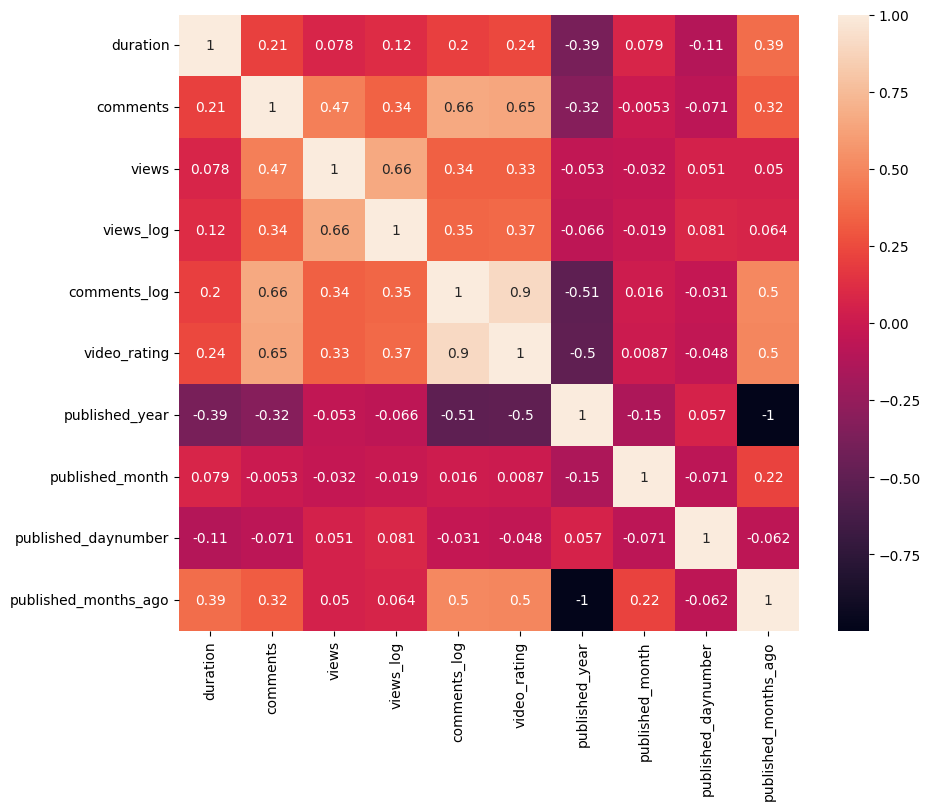

In [218]:
# Plotting correlation  matrix for all features with respect to target variable
correlmap = TEDtalks_df.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlmap, annot=True, ax = ax)

In [220]:
TEDtalks_df.columns

Index(['occupations', 'available_lang', 'duration', 'comments', 'views',
       'views_log', 'comments_log', 'speaker_popularity', 'video_rating',
       'published_year', 'published_month', 'published_day',
       'published_daynumber', 'published_months_ago', 'TEDevent_type'],
      dtype='object')

## **Removing Multicollinearity**

In [229]:
# Create a copy of the dataset
TEDtalks2 = TEDtalks_df.copy()

In [233]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# create a new DataFrame with only numeric columns
numeric_cols = TEDtalks_df.select_dtypes(include=['int64', 'int32', 'float32', 'float64']).drop(['views'], axis=1)

# calculate VIF for each column
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(numeric_cols.values, i) for i in range(numeric_cols.shape[1])]
vif["features"] = numeric_cols.columns

# print the results
vif

,VIF Factor,features
0,6.047484,duration
1,2.288396,comments
2,8.413481,video_rating
3,3.777389,published_month
4,3.544682,published_daynumber
5,9.034811,published_months_ago


In [232]:
# Step 1: drop published_months_ago column

TEDtalks_df.drop(['published_year','comments_log','views_log'], axis=1, inplace=True)


# Step 2: calculate VIF

numeric_cols = TEDtalks_df.select_dtypes(include=['int64', 'int32', 'float32', 'float64']).drop(['views'], axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(numeric_cols.values, i) for i in range(numeric_cols.shape[1])]
vif["features"] = numeric_cols.columns


# print the results

vif

,VIF Factor,features
0,6.047484,duration
1,2.288396,comments
2,8.413481,video_rating
3,3.777389,published_month
4,3.544682,published_daynumber
5,9.034811,published_months_ago
